## Simpler Returns - Part I

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2000-1-1’ until today.

In [29]:
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [43]:
ticker = 'MFST'
period1 = int(time.mktime(datetime.datetime(2019, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020, 12, 31, 23, 59).timetuple()))
interval = '1d' #1d , 1m , 2wk

In [44]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [45]:
df = pd.read_csv(query_string, index_col = 'Date')

Apply the .**head()** and **.tail()** methods to check if the data is ok. Always pay attention to the dates. Try to get an idea about how the stock price changed during the period.

In [46]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,0.0025,0.0029,0.0023,0.00290,0.00290,6224830
2019-12-03,0.0029,0.0030,0.0027,0.00300,0.00300,3973337
2019-12-04,0.0027,0.0027,0.0017,0.00170,0.00170,8935448
2019-12-05,0.0017,0.0023,0.0017,0.00220,0.00220,3982536
2019-12-06,0.0022,0.0024,0.0019,0.00206,0.00206,6267506


In [47]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,0.0006,0.0007,0.00060,0.0006,0.0006,33683142
2020-12-28,0.0006,0.0007,0.00060,0.0006,0.0006,79375042
2020-12-29,0.0007,0.0008,0.00060,0.0006,0.0006,41247011
2020-12-30,0.0007,0.0008,0.00060,0.0007,0.0007,17056832
2020-12-31,0.0008,0.0008,0.00065,0.0007,0.0007,19524926


### Simple Rate of Return

Calculate the simple returns of ‘MSFT’ for the given timeframe.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [48]:
df['simple_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
# print (df['simple_return'])

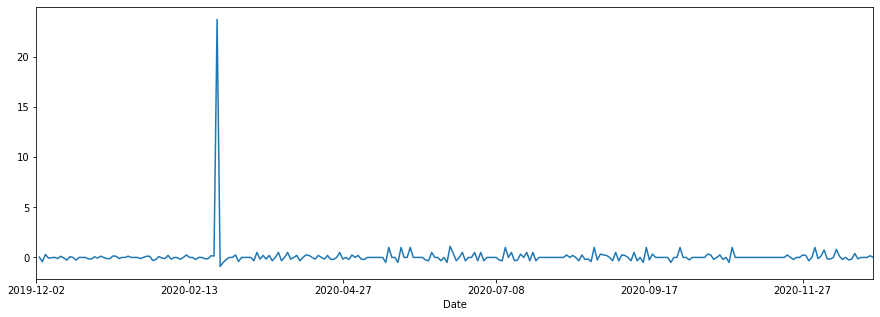

In [49]:
# plotting the simple returns on a graph 
df['simple_return'].plot(figsize=(15,5))
# plt.show()

In [50]:
# Calculate the average daily return.
avg_returns_d = df['simple_return'].mean()
avg_returns_d

0.1114038080044981

In [54]:
# Estimate the average annual return by multiply with 250 trading days
avg_returns_a = df['simple_return'].mean() * 250
avg_returns_a

27.850952001124526

In [56]:
# Print the percentage version of the result as a float with 2 digits after the decimal point.
print (str(round(avg_returns_a, 4) * 100) + ' %')

2785.1 %


Note : '''Seems incorrect for me to simply multiply the daily avg return by 250 as the cumulation of return (return of return)
is missing this way. 
The logreturn can be simply cumulated over a time horizon,
but in case of simple retrun, the formula should be (1+daily avg return) ** 250 - 1.'''